In [1]:
import numpy as np
import pylab as plt

In [2]:
points_list = [(1,5),(1,3),(3,4),(3,2),(0,4),(4,5)]

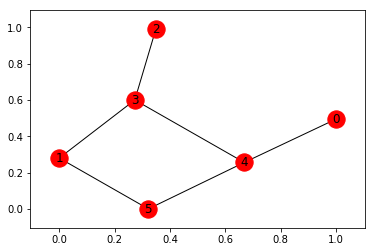

In [3]:
goal = 5
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [4]:
R = np.matrix(np.ones(shape=(6, 6)))
R *= -1

In [5]:
R

matrix([[-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1.]])

In [6]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]]= 0
R[goal,goal]= 100

(1, 5)
(1, 3)
(3, 4)
(3, 2)
(0, 4)
(4, 5)


In [7]:
R

matrix([[  -1.,   -1.,   -1.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,    0.,   -1.,  100.],
        [  -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,    0.,   -1.,    0.,   -1.],
        [   0.,   -1.,   -1.,    0.,   -1.,  100.],
        [  -1.,    0.,   -1.,   -1.,    0.,  100.]])

In [8]:
Q = np.matrix(np.zeros([6,6]))
Y=0.8
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act


In [9]:
initial_state=2
available_act = available_actions(initial_state)

In [10]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [11]:
action = sample_next_action(available_act)

In [12]:
def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

In [13]:
update(initial_state, action, Y)

max_value 0.0


0

In [14]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,Y)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.555555556
max_value 144.0
Score: 235.555555556
max_value 144.0
Score: 235.555555556
max_value 0.0
Score: 235.555555556
max_value 0.0
Score: 235.555555556
max_value 0.0
Score: 235.555555556
max_value 0.0
Score: 235.555555556
max_value 215.2
Score: 213.382899628
max_value 0.0
Score: 213.382899628
max_value 0.0
Score: 213.382899628
max_value 0.0
Score: 213.382899628
max_value 0.0
Score: 213.382899628
max_value 0.0
Score: 213.382899628
max_value 172.16
Score: 293.382899628
max_value 0.0
Score: 293.382899628
max_value 215.2
Score: 346.914498141
max_value 172.16
Score: 346.914498141
max_value 272.16
Score: 295.238095238
max_value 317.728
Score: 267.237385437
max_value 172.16
Score: 276.100312217
max_value 0.0
Score: 276.100312217
max_value 172.16
Score: 276.100312217
max_value 0.0
Score: 276.100312217
max_value 354.1824
Score: 286.922896225
max_value 0.0
Score:

Score: 1007.16857553
max_value 399.98759521
Score: 1007.17094025
max_value 499.990076168
Score: 1007.16643885
max_value 319.990076168
Score: 1007.17391834
max_value 319.990076168
Score: 1007.17391834
max_value 499.992060935
Score: 1007.17143367
max_value 399.993648748
Score: 1007.17326465
max_value 399.98759521
Score: 1007.17326465
max_value 499.992060935
Score: 1007.17477806
max_value 399.993648748
Score: 1007.18533811
max_value 399.993648748
Score: 1007.18533811
max_value 319.994918998
Score: 1007.18630669
max_value 399.993648748
Score: 1007.18751741
Trained Q matrix:
[[   0.            0.            0.            0.           79.99878927
     0.        ]
 [   0.            0.            0.           63.99903142    0.          100.        ]
 [   0.            0.            0.           64.            0.            0.        ]
 [   0.           80.           51.19324157    0.           80.            0.        ]
 [  63.99903142    0.            0.           63.99903142    0.          

Most efficient path:
[2, 3, 1, 5]


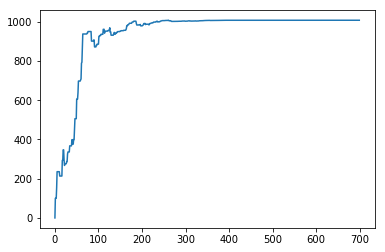

In [15]:
current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()